In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [318]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train:', train.shape, ', Test:', test.shape)

Train: (1460, 81) , Test: (1459, 80)


# MISSING VALUE TREATMENT AND ENCODING

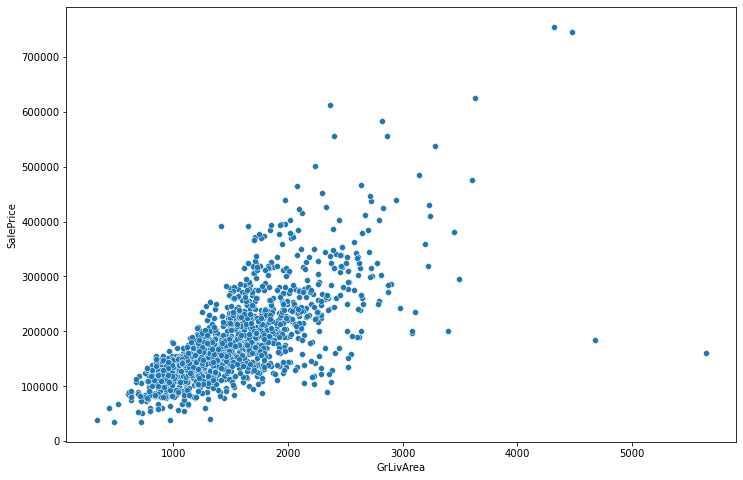

In [319]:
# Removal of outliers. 

plt.rcParams['figure.figsize'] = [12, 8]

sns.scatterplot(data=train, x=train.GrLivArea, y=train.SalePrice)
plt.show()

There are a few houses that are very large that have been sold for a small price. 
Besides, there are very few examples in the region beyond x>4000

In [320]:
train = train[train.GrLivArea <= 4000]
train.shape

(1456, 81)

This resulted in a data loss of 4 instances.

In [321]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [322]:
def treat_null(X):

    X.loc[:, 'Alley'] = X.loc[:, 'Alley'].fillna('None')

    X.loc[:, 'BedroomAbvGr'] = X.loc[:, 'BedroomAbvGr'].fillna(0)

    X.loc[:, 'BsmtQual'] = X.loc[: 'BsmtQual'].fillna('No')
    
    X.loc[:, 'BsmtCond'] = X.loc[:, 'BsmtCond'].fillna('No')
    
    X.loc[:, 'BsmtExposure'] = X.loc[:, 'BsmtExposure'].fillna('No')
    
    X.loc[:, 'BsmtFinType1'] = X.loc[:, 'BsmtFinType1'].fillna('No')
    
    X.loc[:, 'BsmtFinType2'] = X.loc[:, 'BsmtFinType2'].fillna('No')
    
    X.loc[:, 'BsmtFullBath'] = X.loc[:, 'BsmtFullBath'].fillna('No')
    
    X.loc[:, 'BsmtHalfBath'] = X.loc[:, 'BsmtHalfBath'].fillna('No')
    
    X.loc[:, 'BsmtUnfSF'] = X.loc[:, 'BsmtUnfSF'].fillna('No')
    
    X.loc[:, 'CentralAir'] = X.loc[:, 'CentralAir'].fillna('No')
    
    X.loc[:, "Condition1"] = X.loc[:, "Condition1"].fillna("Norm")
    
    X.loc[:, "Condition2"] = X.loc[:, "Condition2"].fillna("Norm")

    X.loc[:, 'Electrical'] = X.loc[:, 'Electrical'].fillna('SBrkr')
    X.loc[:, "EnclosedPorch"] = X.loc[:, "EnclosedPorch"].fillna(0)

    X.loc[:, "ExterCond"] = X.loc[:, "ExterCond"].fillna("TA")
    X.loc[:, "ExterQual"] = X.loc[:, "ExterQual"].fillna("TA")

    X.loc[:, "Fence"] = X.loc[:, "Fence"].fillna("No")

    X.loc[:, "FireplaceQu"] = X.loc[:, "FireplaceQu"].fillna("No")
    
    X.loc[:, "Fireplaces"] = X.loc[:, "Fireplaces"].fillna(0)

    X.loc[:, "Functional"] = X.loc[:, "Functional"].fillna("Typ")
    
    X.loc[:, "GarageType"] = X.loc[:, "GarageType"].fillna("No")
    
    X.loc[:, "GarageFinish"] = X.loc[:, "GarageFinish"].fillna("No")
    
    X.loc[:, "GarageQual"] = X.loc[:, "GarageQual"].fillna("No")

    X.loc[:, "GarageCond"] = X.loc[:, "GarageCond"].fillna("No")

    X.loc[:, "GarageArea"] = X.loc[:, "GarageArea"].fillna(0)

    X.loc[:, "GarageCars"] = X.loc[:, "GarageCars"].fillna(0)

    X.loc[:, "HalfBath"] = X.loc[:, "HalfBath"].fillna(0)

    X.loc[:, "HeatingQC"] = X.loc[:, "HeatingQC"].fillna("TA")

    X.loc[:, "KitchenAbvGr"] = X.loc[:, "KitchenAbvGr"].fillna(0)
   
    X.loc[:, "KitchenQual"] = X.loc[:, "KitchenQual"].fillna("TA")

    X.loc[:, "LotFrontage"] = X.loc[:, "LotFrontage"].fillna(0)

    X.loc[:, "LotShape"] = X.loc[:, "LotShape"].fillna("Reg")

    X.loc[:, "MasVnrType"] = X.loc[:, "MasVnrType"].fillna("None")
    
    X.loc[:, "MasVnrArea"] = X.loc[:, "MasVnrArea"].fillna(0)
    
    X.loc[:, "MiscFeature"] = X.loc[:, "MiscFeature"].fillna("No")

    X.loc[:, "MiscVal"] = X.loc[:, "MiscVal"].fillna(0)

    X.loc[:, "OpenPorchSF"] = X.loc[:, "OpenPorchSF"].fillna(0)

    X.loc[:, "PavedDrive"] = X.loc[:, "PavedDrive"].fillna("N")

    X.loc[:, "PoolQC"] = X.loc[:, "PoolQC"].fillna("No")
    
    X.loc[:, "PoolArea"] = X.loc[:, "PoolArea"].fillna(0)

    X.loc[:, "SaleCondition"] = X.loc[:, "SaleCondition"].fillna("Normal")

    X.loc[:, "ScreenPorch"] = X.loc[:, "ScreenPorch"].fillna(0)

    X.loc[:, "TotRmsAbvGrd"] = X.loc[:, "TotRmsAbvGrd"].fillna(0)

    X.loc[:, "Utilities"] = X.loc[:, "Utilities"].fillna("AllPub")

    X.loc[:, "WoodDeckSF"] = X.loc[:, "WoodDeckSF"].fillna(0)
    

In [323]:
treat_null(train)

In [325]:
train.columns[train.isnull().any()]

Index(['GarageYrBlt'], dtype='object')

This column probably has missing values wherever the response to 'GarageType' = 'No'.

We can replace this value with 0, or any other completely unrelated value.

In [330]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

In [326]:
# replacing numeric features that are actually really categories
def replace_numeric_with_cat(X):
    X = X.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    
    return X

train = replace_numeric_with_cat(train)  

In [328]:
# ordinally encoding categories

def ordinal_encode(X):
    X = X.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )
    
    return X

train = ordinal_encode(train)

In [332]:
# Dropping the Id column from train

train.drop('Id', axis=1, inplace=True)

In [343]:
train_num = train.select_dtypes(np.number)
train_num

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice
0,65.0,8450,2,4,4,3,7,5,2003,2003,196.0,4,3,4,3,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,548,3,3,2,0,61,0,0,0,0,0,0,2008,208500
1,80.0,9600,2,4,4,3,6,8,1976,1976,0.0,3,3,4,3,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,460,3,3,2,298,0,0,0,0,0,0,0,2007,181500
2,68.0,11250,2,3,4,3,7,5,2001,2002,162.0,4,3,4,3,1,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001.0,2,608,3,3,2,0,42,0,0,0,0,0,0,2008,223500
3,60.0,9550,2,3,4,3,7,5,1915,1970,0.0,3,3,3,4,0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998.0,3,642,3,3,2,0,35,272,0,0,0,0,0,2006,140000
4,84.0,14260,2,3,4,3,8,5,2000,2000,350.0,4,3,4,3,2,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2000.0,3,836,3,3,2,192,84,0,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2,4,4,3,6,5,1999,2000,0.0,3,3,4,3,0,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,3,1999.0,2,460,3,3,2,0,40,0,0,0,0,0,0,2007,175000
1456,85.0,13175,2,4,4,3,6,6,1978,1988,119.0,3,3,4,3,0,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,7,2,3,1978.0,2,500,3,3,2,349,0,0,0,0,0,0,0,2010,210000
1457,66.0,9042,2,4,4,3,7,9,1941,2006,0.0,5,4,3,4,0,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,4,1941.0,1,252,3,3,2,0,60,0,0,0,0,0,2500,2010,266500
1458,68.0,9717,2,4,4,3,5,6,1950,1996,0.0,3,3,3,3,1,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,8,0,0,1950.0,1,240,3,3,2,366,0,112,0,0,0,0,0,2010,142125


Checking for columns that are actually categorical 

Choosing to including the ordinal categories in numeric

 'Street' - replace 2 with 1, and 1 with 0, switch to categoric


In [344]:
train_num['Street'] = train_num['Street'].replace({2: 1, 1: 0})

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/3225104163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['Street'] = train_num['Street'].replace({2: 1, 1: 0})


In [335]:
train_num['Street'].value_counts()

1    1450
0       6
Name: Street, dtype: int64

will drop this column from numeric and add it to categoric

In [345]:
train_cat = train.select_dtypes('object')
train_cat

# these will need one hot encoding.

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Feb,WD,Normal
1,SC20,RL,None,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,RFn,No,No,May,WD,Normal
2,SC60,RL,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Sep,WD,Normal
3,SC70,RL,None,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd,Unf,No,No,Feb,WD,Abnorml
4,SC60,RL,None,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Dec,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,None,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,RFn,No,No,Aug,WD,Normal
1456,SC20,RL,None,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,CBlock,GasA,Y,SBrkr,Attchd,Unf,MnPrv,No,Feb,WD,Normal
1457,SC70,RL,None,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Stone,GasA,Y,SBrkr,Attchd,RFn,GdPrv,Shed,May,WD,Normal
1458,SC20,RL,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,FuseA,Attchd,Unf,No,No,Apr,WD,Normal


In [337]:
train_cat.describe()

,MSSubClass,MSZoning,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,Fence,MiscFeature,MoSold,SaleType,SaleCondition
count,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
unique,15,5,3,4,5,25,9,8,5,8,6,7,15,16,4,6,6,2,5,7,4,5,5,12,9,6
top,SC20,RL,None,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,SBrkr,Attchd,Unf,No,No,Jun,WD,Normal
freq,536,1147,1365,1309,1051,225,1258,1442,1216,726,1140,1432,515,504,871,643,1424,1361,1331,867,605,1176,1402,253,1265,1197


In [346]:
train_cat = pd.get_dummies(train_cat, drop_first=True)
train_cat

,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC75,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_2,Alley_None,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [347]:
train_cat = pd.concat([train_cat, train_num['Street']], axis=1)
train_num.drop('Street', axis=1, inplace=True)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Outlier Removal

LotFrontage
-0.005549048153806902


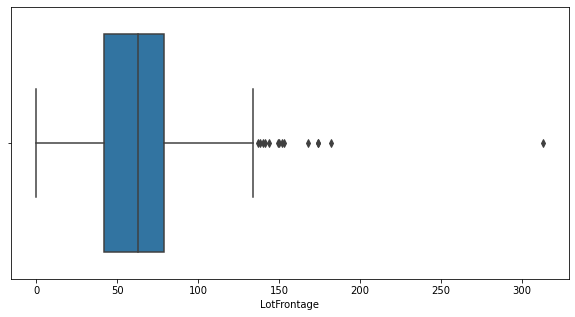

LotArea
12.587561473397649


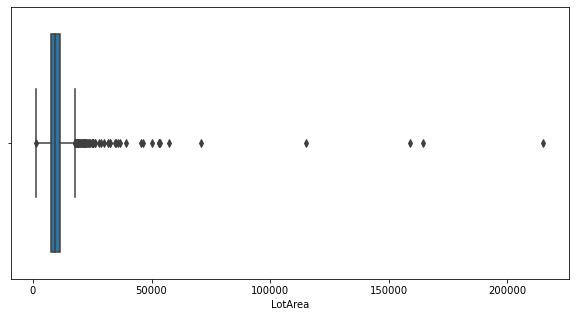

LotShape
-1.2911497403291294


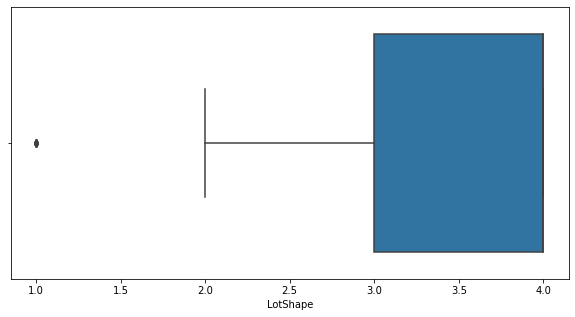

Utilities
-38.1575680566778


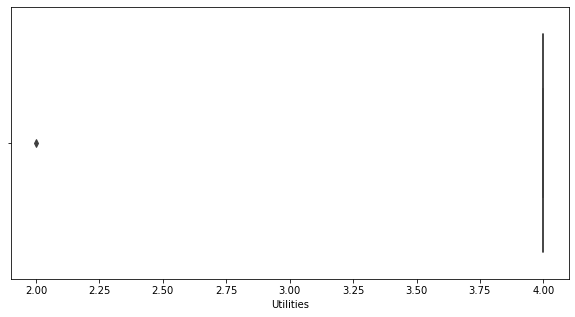

LandSlope
-4.806278538476591


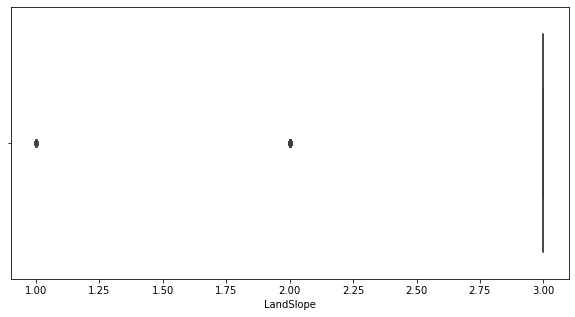

OverallQual
0.18387072690515266


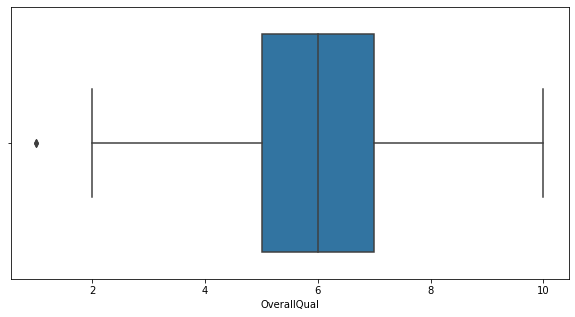

OverallCond
0.6906307948342062


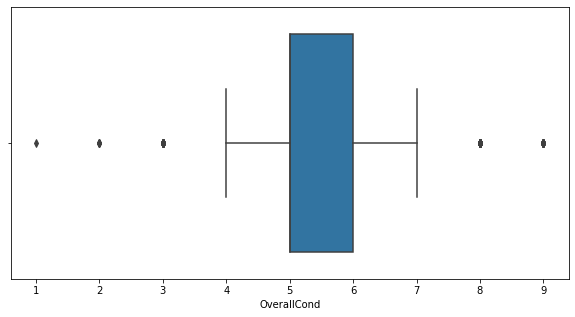

YearBuilt
-0.6100865132247322


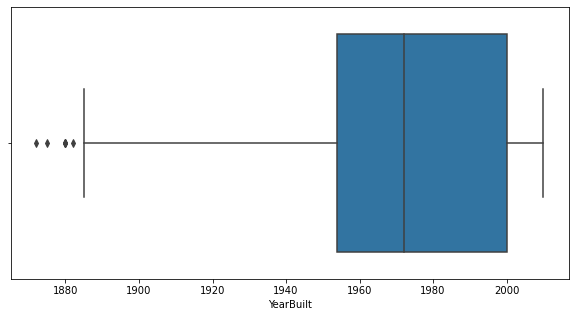

YearRemodAdd
-0.4998309619319798


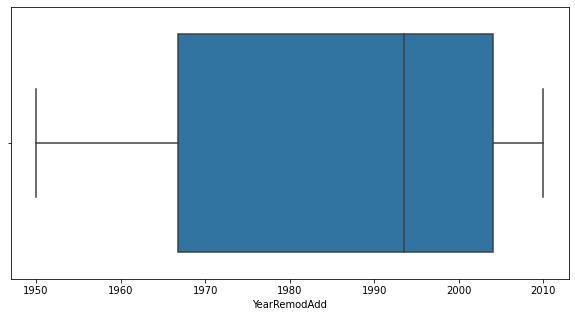

MasVnrArea
2.657499273822433


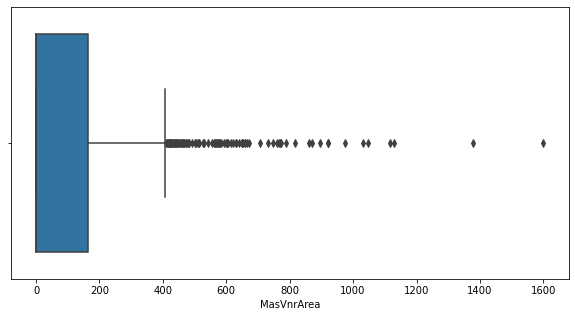

ExterQual
0.8189584981802339


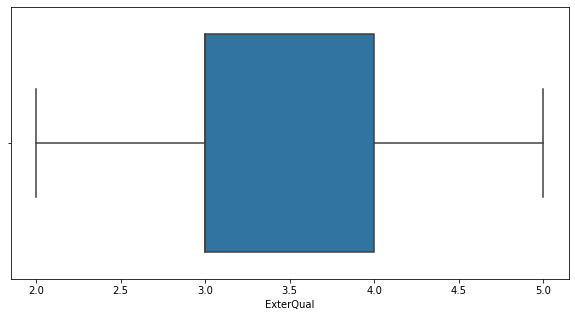

ExterCond
1.3937083611871635


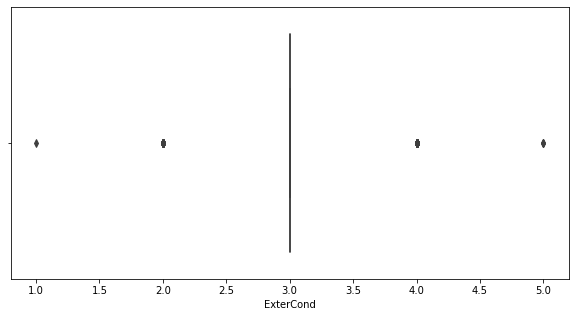

BsmtQual
-1.301682227601071


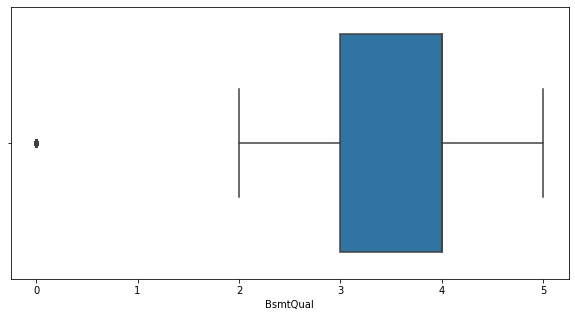

BsmtCond
-3.695215379386502


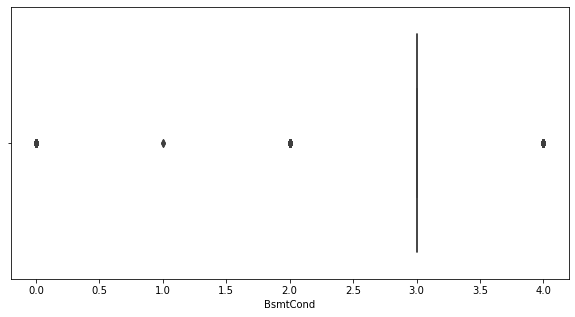

BsmtExposure
1.2260836004329216


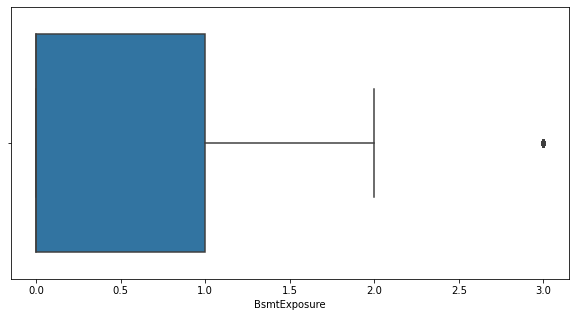

BsmtFinType1
-0.15458948539492143


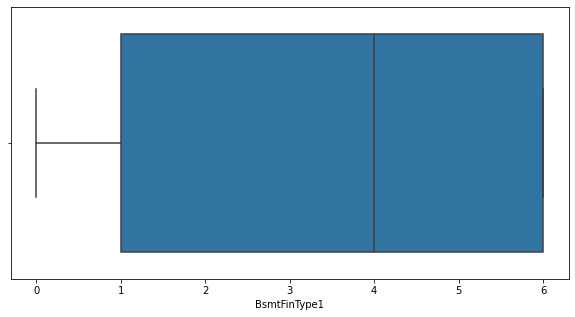

BsmtFinSF1
0.7448554856296865


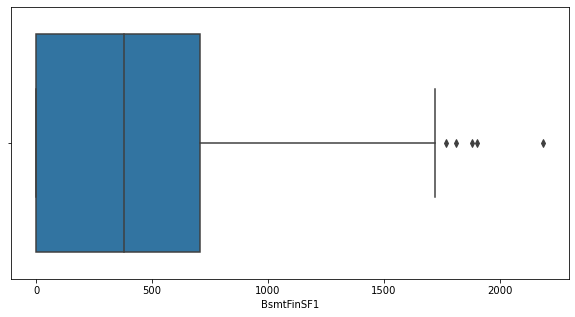

BsmtFinType2
3.291303304196015


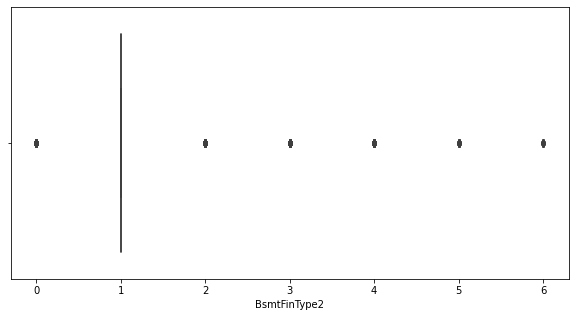

BsmtFinSF2
4.248586900519406


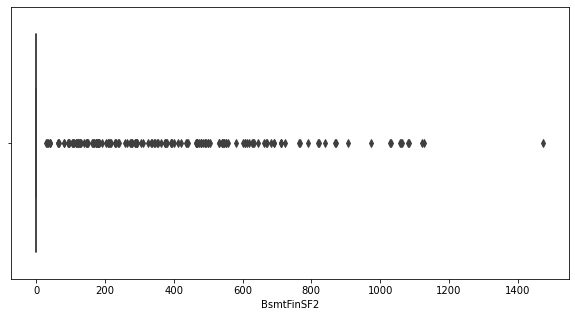

BsmtUnfSF
0.9217587594500611


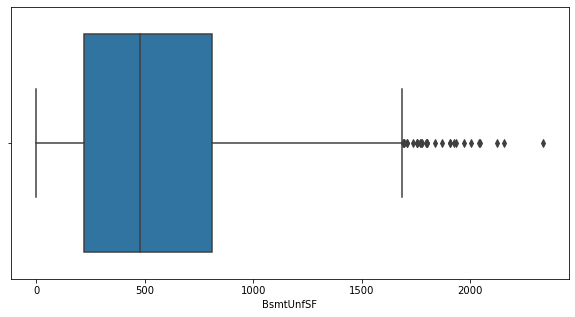

TotalBsmtSF
0.48639533694703774


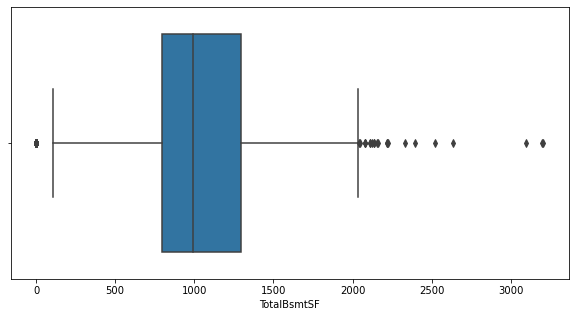

HeatingQC
-0.5360840236393851


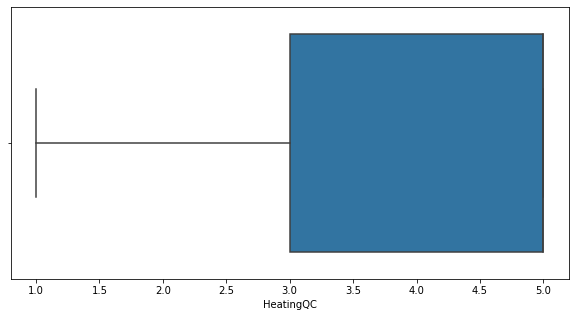

1stFlrSF
0.8670808651211774


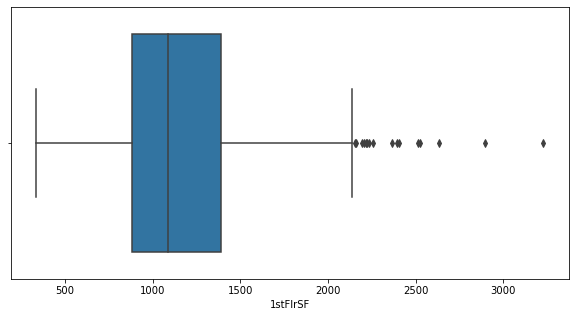

2ndFlrSF
0.7778663580365494


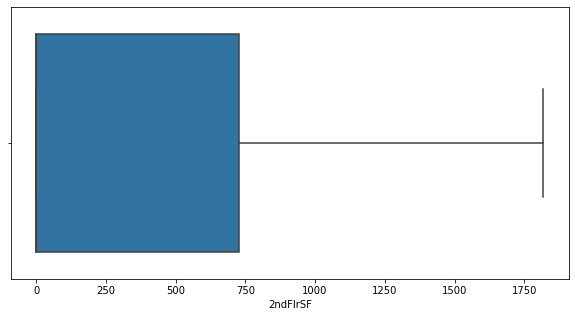

LowQualFinSF
8.998564223097553


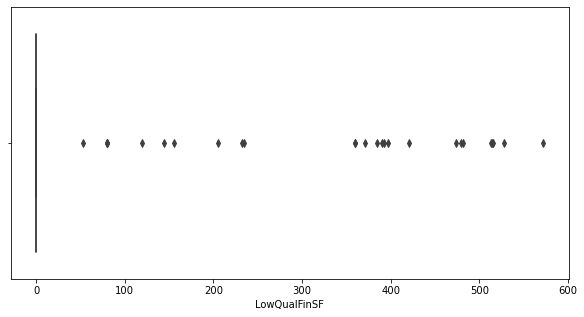

GrLivArea
0.8351923886551447


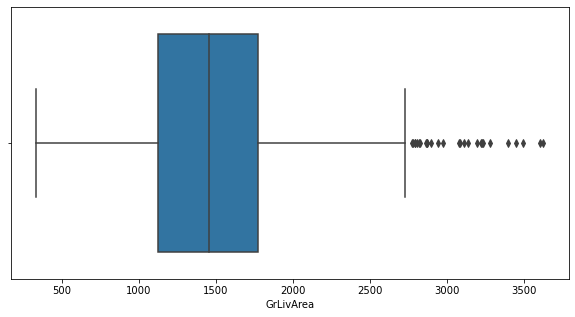

BsmtFullBath
0.5911523018088685


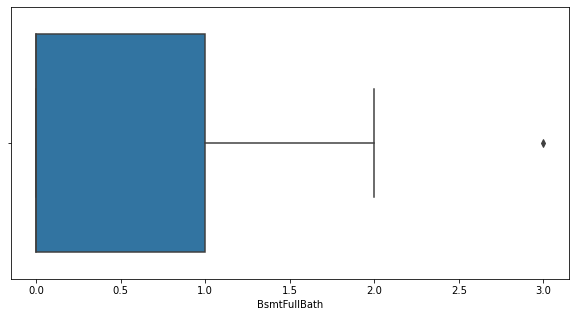

BsmtHalfBath
4.128966618050054


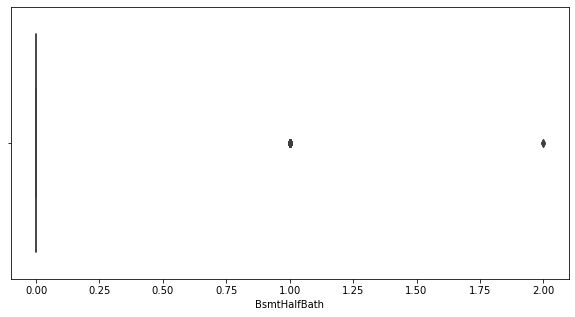

FullBath
0.017693587867073528


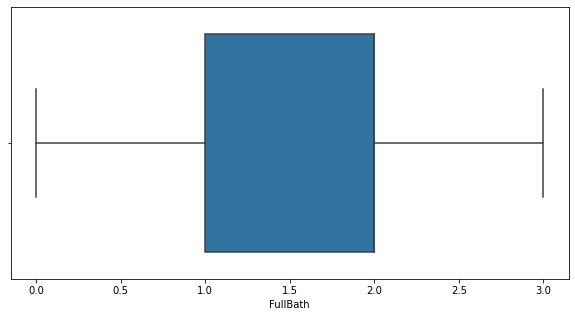

HalfBath
0.6842230842005776


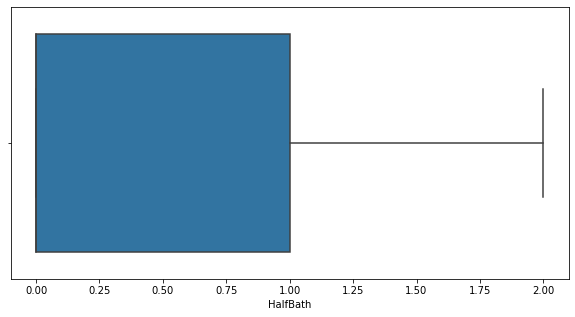

BedroomAbvGr
0.21506674449586063


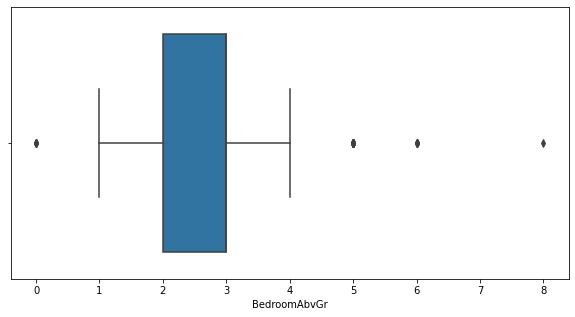

KitchenAbvGr
4.481366385352843


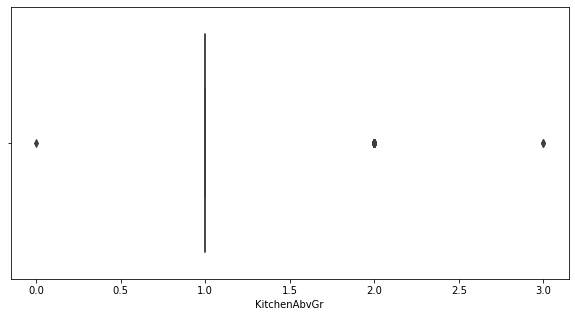

KitchenQual
0.38143326562597524


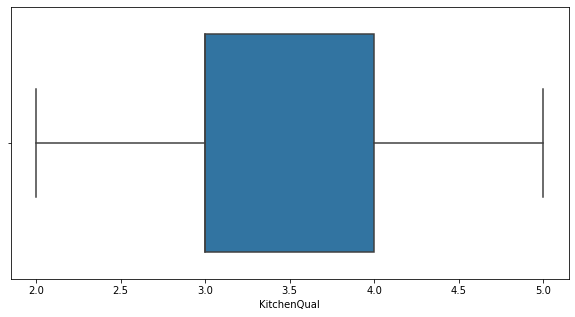

TotRmsAbvGrd
0.6614164666720442


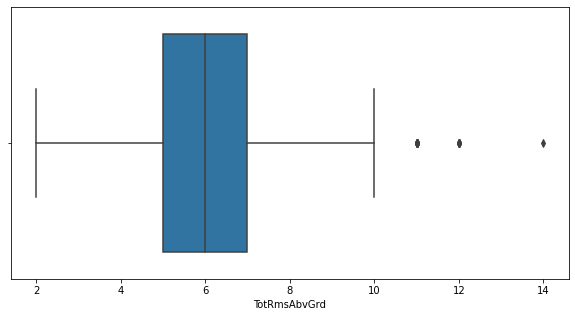

Functional
-4.90471394076503


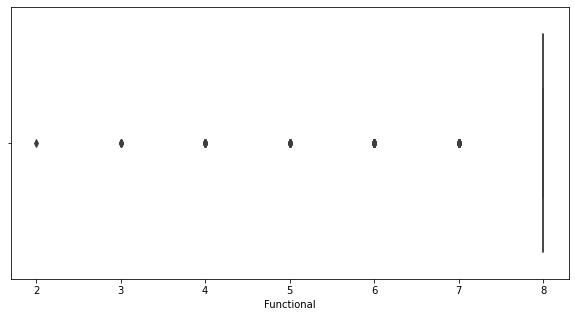

Fireplaces
0.6326775818360327


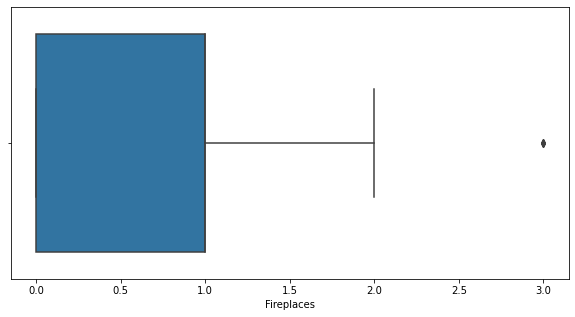

FireplaceQu
0.11698368977932562


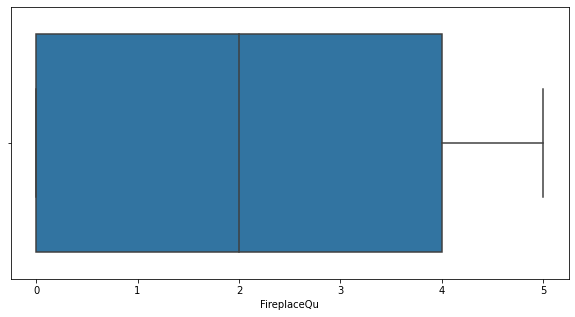

GarageYrBlt
-3.8632315405513262


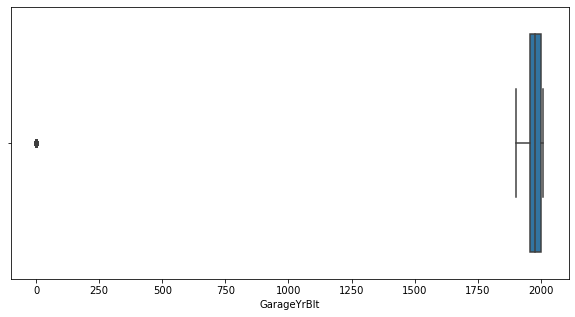

GarageCars
-0.34347539404012


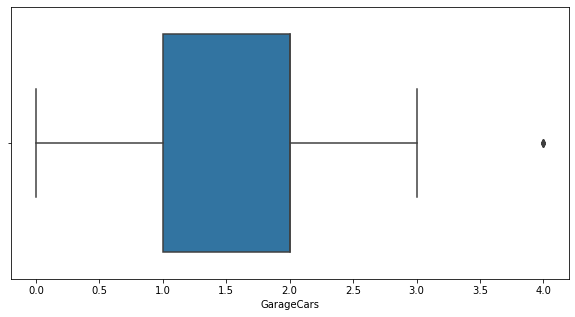

GarageArea
0.13299116169635294


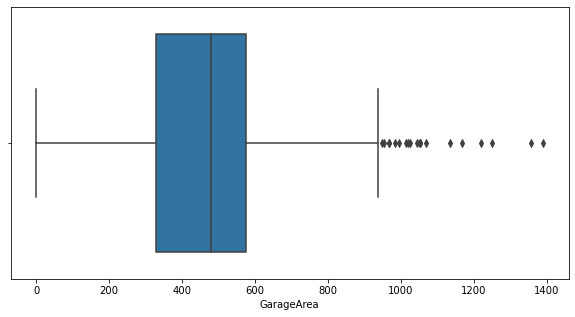

GarageQual
-3.222968464977179


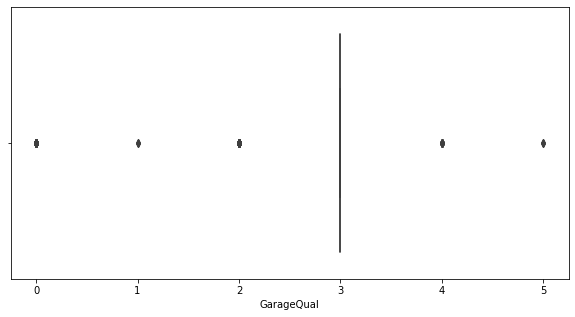

GarageCond
-3.3261720766162575


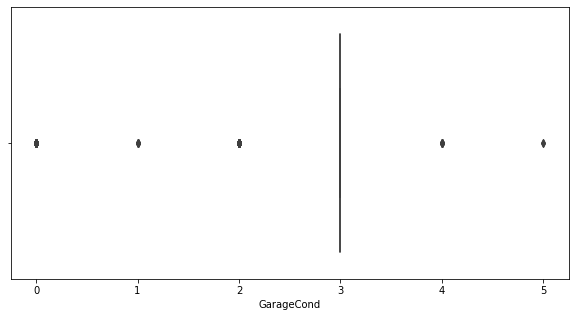

PavedDrive
-3.303234421545227


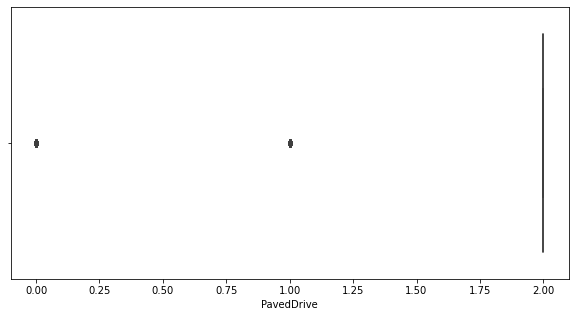

WoodDeckSF
1.5512706094546915


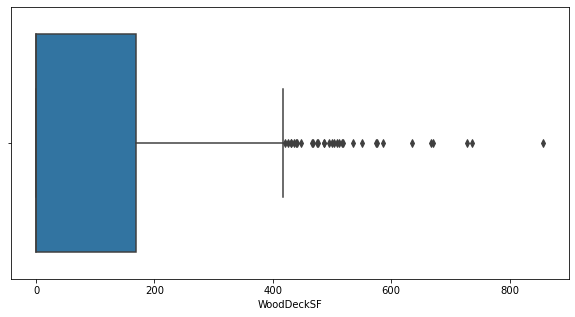

OpenPorchSF
2.3398461730491924


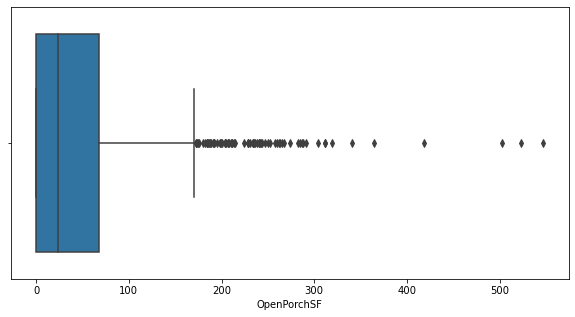

EnclosedPorch
3.084453658776395


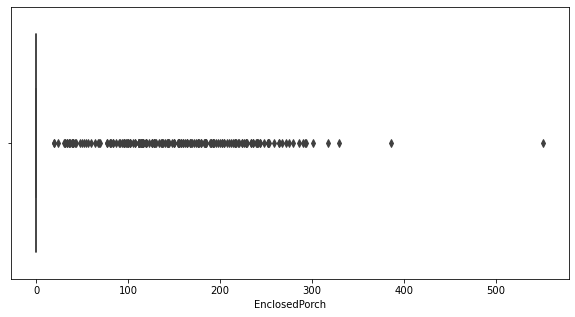

3SsnPorch
10.289865655700298


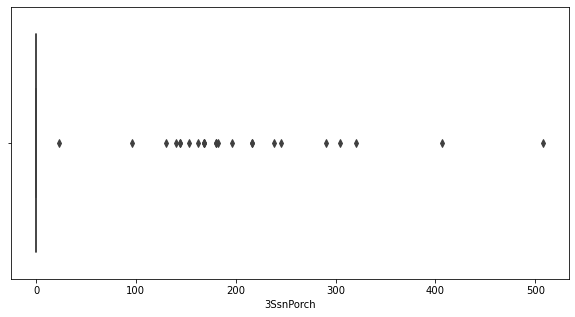

ScreenPorch
4.115641120236566


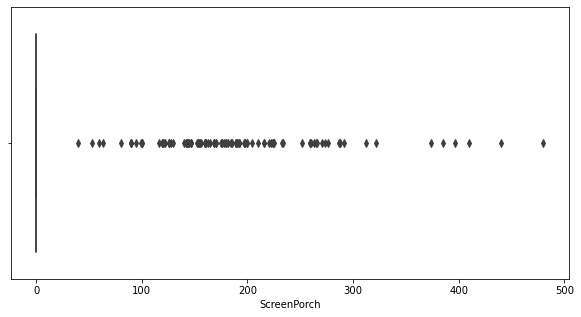

PoolArea
17.522613286560457


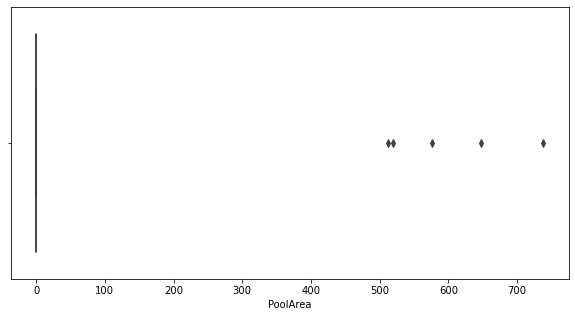

PoolQC
21.150499090721393


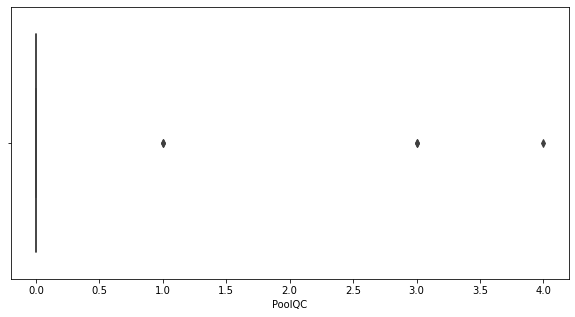

MiscVal
24.443364355103984


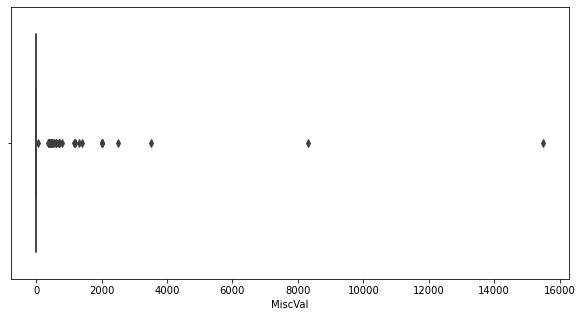

YrSold
0.09321383457628772


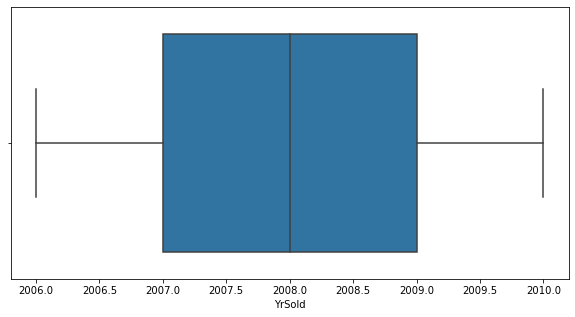

SalePrice
1.5659592925562151


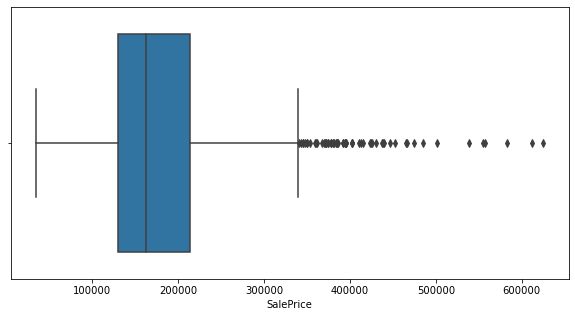

In [341]:
# Checking for outliers

for i in range(train_num.shape[1]):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_num.iloc[:, i])
    print(train_num.columns[i])
    print(train_num.iloc[:, i].skew())
    plt.show()

A lot of the columns have outliers, we can cap the the observation with the most extreme observations.


LotFrontage


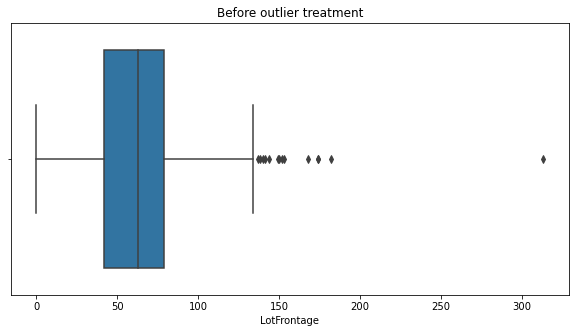

Removing outliers for:  LotFrontage
Upper quart 79.0
Lower quart 42.0
37.0


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[col] = cap_outliers(col)


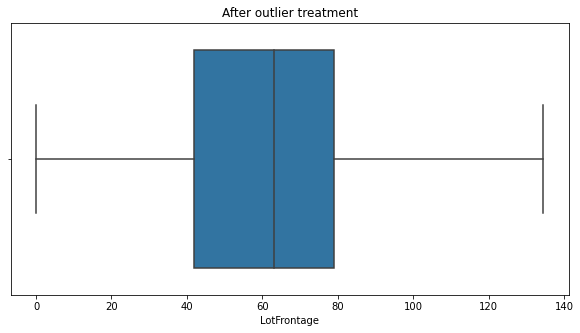



LotArea


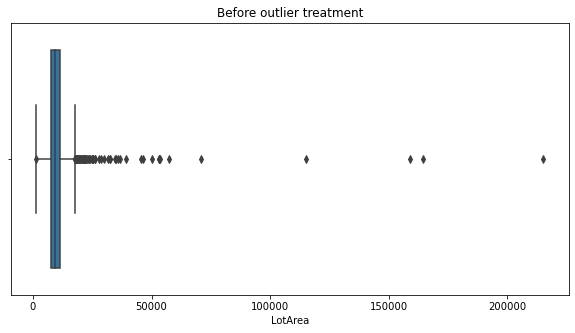

Removing outliers for:  LotArea
Upper quart 11588.0
Lower quart 7538.75
4049.25


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

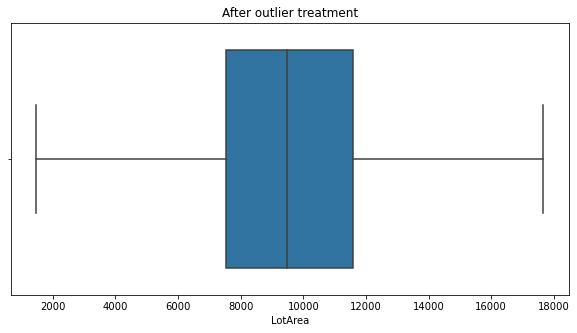



YearBuilt


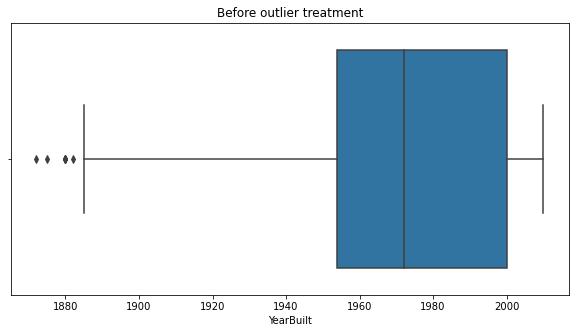

Removing outliers for:  YearBuilt
Upper quart 2000.0
Lower quart 1954.0
46.0


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[col] = cap_outliers(col)


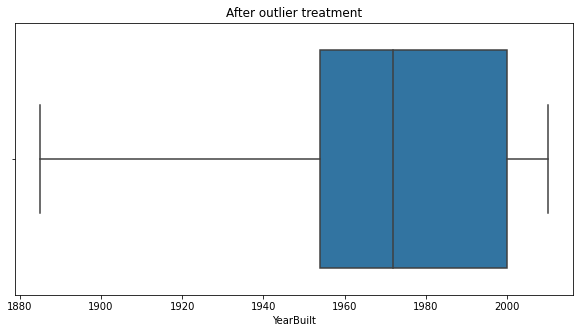



MasVnrArea


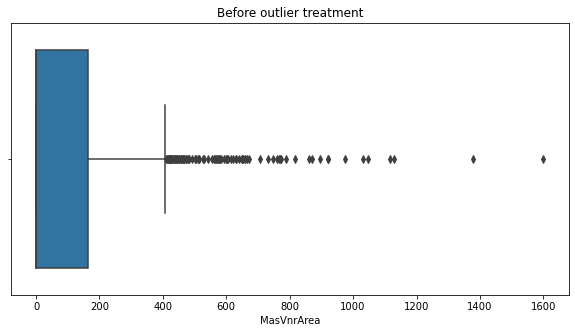

Removing outliers for:  MasVnrArea
Upper quart 163.25
Lower quart 0.0
163.25


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[col] = cap_outliers(col)


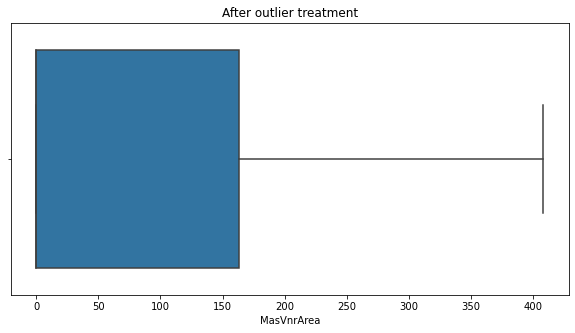



BsmtFinSF1


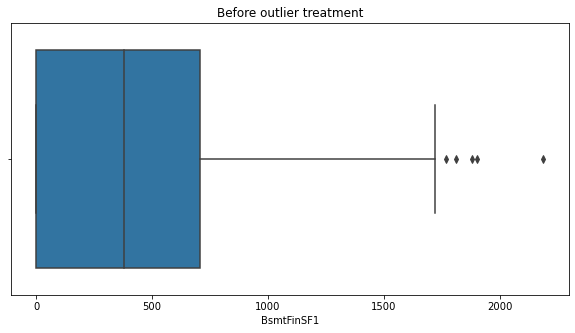

Removing outliers for:  BsmtFinSF1
Upper quart 706.5
Lower quart 0.0
706.5


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

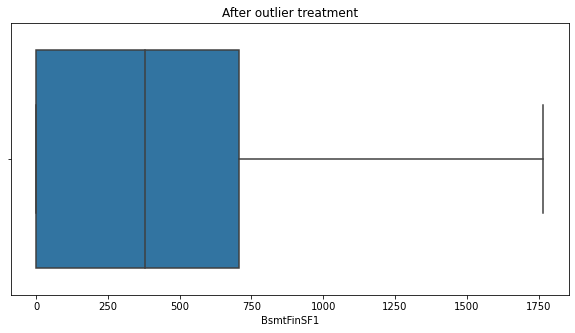



BsmtUnfSF


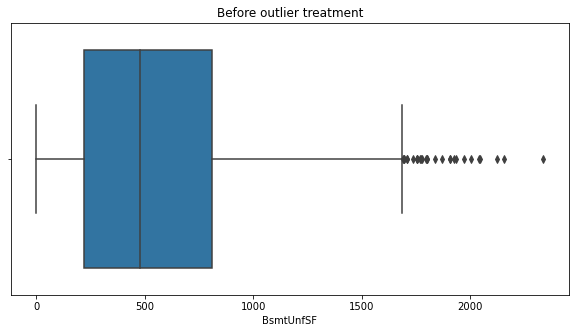

Removing outliers for:  BsmtUnfSF
Upper quart 808.0
Lower quart 222.5
585.5


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

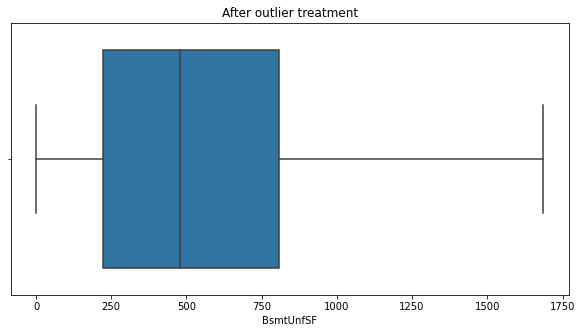



TotalBsmtSF


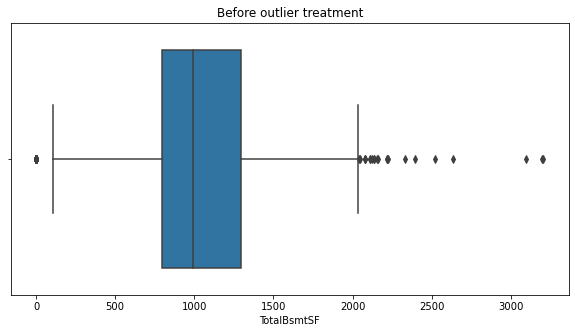

Removing outliers for:  TotalBsmtSF
Upper quart 1293.75
Lower quart 795.0
498.75


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

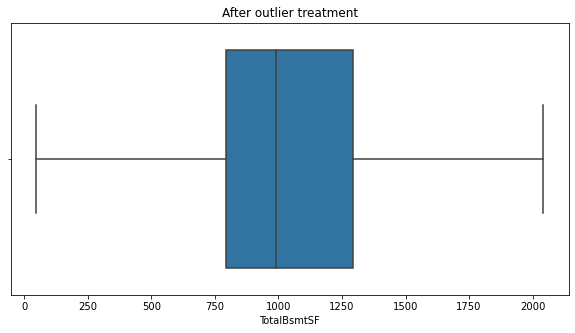



1stFlrSF


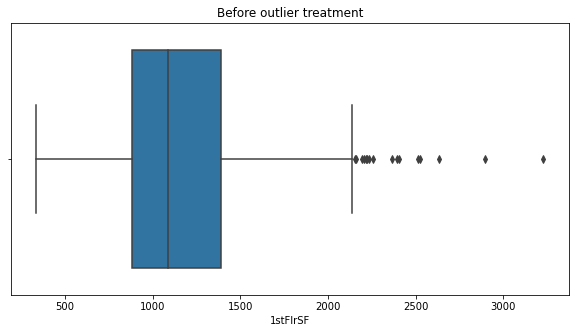

Removing outliers for:  1stFlrSF
Upper quart 1389.25
Lower quart 882.0
507.25


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

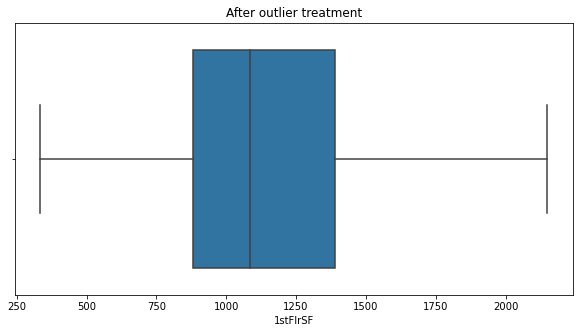



GrLivArea


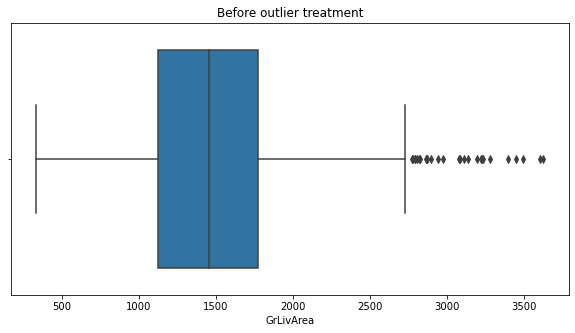

Removing outliers for:  GrLivArea
Upper quart 1775.25
Lower quart 1128.0
647.25


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

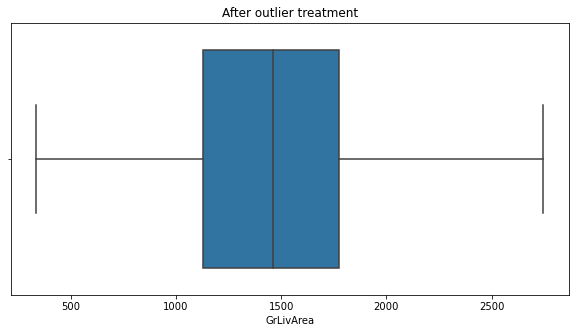



GarageArea


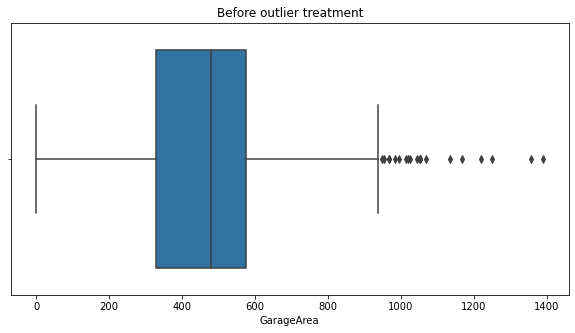

Removing outliers for:  GarageArea
Upper quart 576.0
Lower quart 329.5
246.5


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

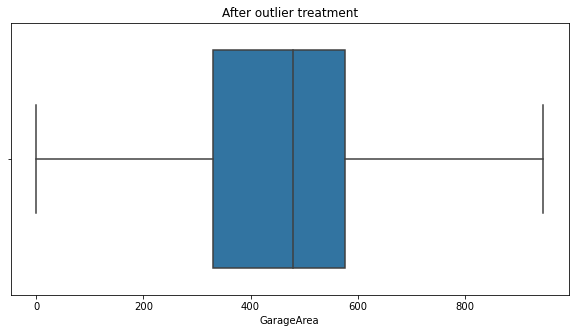



WoodDeckSF


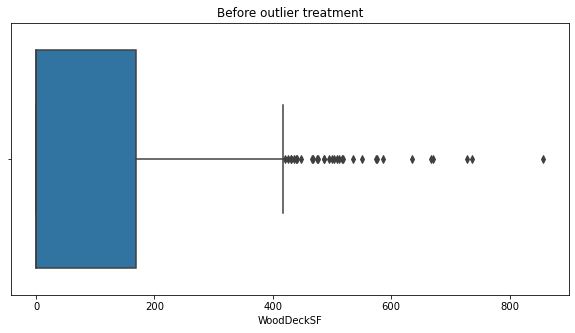

Removing outliers for:  WoodDeckSF
Upper quart 168.0
Lower quart 0.0
168.0


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[col] = cap_outliers(col)


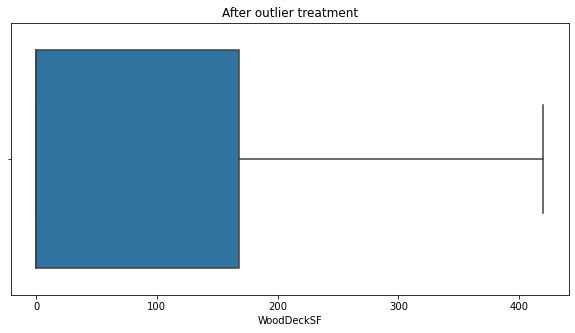



OpenPorchSF


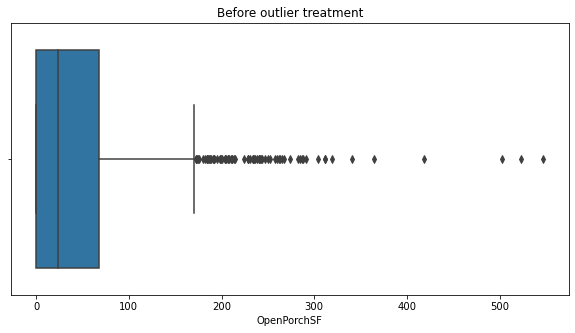

Removing outliers for:  OpenPorchSF
Upper quart 68.0
Lower quart 0.0
68.0


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_13170/2721951656.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[col] = cap_outliers(col)


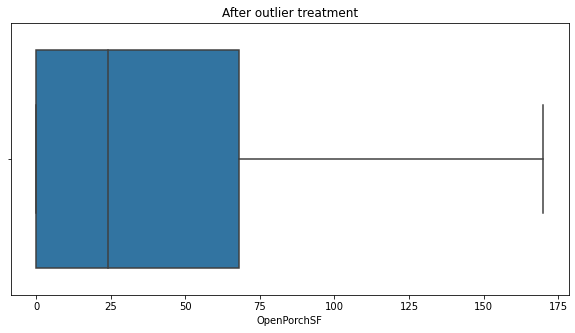

In [348]:
# list of columns to remove outliers from:
# Capping the outliers with the highest acceptable value instead of removing them

cols_iqr = ['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
           '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.rcParams['figure.figsize'] = [10, 5]

def cap_outliers(col):
    
    print('Removing outliers for: ', col)
    
    x = train_num[col]
    upper_quart = x.quantile(0.75)
    lower_quart = x.quantile(0.25)
    print('Upper quart', upper_quart)
    print('Lower quart', lower_quart)
    
    IQR = upper_quart - lower_quart
    print(IQR)
    
    for ind in x.index:
        if (x.loc[ind]) > (upper_quart + 1.5*IQR):
            x.loc[ind] = upper_quart + 1.5*IQR
          
        
        if (x.loc[ind]) < (lower_quart - 1.5*IQR):
            x.loc[ind] = lower_quart - 1.5*IQR
    
    return x
        
for col in cols_iqr:
    print(col)
    
    sns.boxplot(x=train_num[col])
    plt.title('Before outlier treatment')
    plt.show()
    
    train_num[col] = cap_outliers(col)
    
    sns.boxplot(x=train_num[col])
    plt.title('After outlier treatment')
    plt.show()
    
    print('\n')

# --- END OF EDA ---

## Applying PCA on the numeric dataset

In [353]:
train_num.shape

(1456, 53)

In [354]:
X_num = train_num.drop('SalePrice', axis=1)
X_num.shape

(1456, 52)

Sample is large enough (variable to rows ratio should be about 1 to 15)

In [355]:
plt.rcParams['figure.figsize'] = [25, 15]
X_num.corr().style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold
LotFrontage,1.000000,0.227148,0.171037,0.045601,0.058326,0.154870,-0.054224,0.029345,0.068136,0.074660,0.111226,-0.047385,0.077177,0.012473,0.045373,-0.039853,0.000197,-0.013675,-0.007395,0.172789,0.191646,0.096516,0.203088,0.020669,0.047831,0.164467,-0.015644,-0.032664,0.106274,-0.023327,0.139847,0.040488,0.107825,0.197920,0.000983,0.014410,0.069321,0.017447,0.162030,0.181876,0.010828,0.010673,0.014141,-0.017817,0.059126,0.025632,0.027103,0.029478,0.020209,0.032036,-0.061447,-0.010507
LotArea,0.227148,1.000000,-0.355795,-0.034824,-0.175088,0.208865,-0.017038,0.060495,0.050061,0.135446,0.125129,0.052537,0.113076,0.040250,0.212869,0.051358,0.202732,0.063244,0.096946,0.086121,0.352723,0.052835,0.449733,0.108202,0.018716,0.425539,0.114339,0.037802,0.204416,0.093015,0.283740,-0.017486,0.142761,0.384822,-0.031184,0.344869,0.312542,0.147048,0.304239,0.337520,0.159726,0.146187,0.043616,0.192325,0.155199,-0.004908,0.070263,0.109599,0.077076,0.079025,0.057111,-0.034676
LotShape,0.171037,-0.355795,1.000000,0.026964,0.146579,-0.187991,0.031974,-0.225994,-0.172097,-0.060009,-0.178394,-0.015423,-0.205124,-0.108504,-0.170268,-0.106529,-0.123445,-0.063449,-0.062407,-0.015458,-0.172404,-0.116005,-0.163216,-0.079691,0.007412,-0.189071,-0.055060,-0.056792,-0.179029,-0.111359,-0.058003,0.094532,-0.148571,-0.124094,-0.022401,-0.190299,-0.188824,-0.092071,-0.192631,-0.165186,-0.108734,-0.102313,-0.102975,-0.158166,-0.098095,0.093999,-0.034675,-0.067111,-0.001483,0.006524,-0.029321,0.036830
Utilities,0.045601,-0.034824,0.026964,1.000000,-0.005926,0.001696,-0.009976,0.011513,0.034057,-0.063002,0.018037,0.006251,0.014548,-0.003095,0.016489,-0.030633,0.019918,-0.051427,-0.049898,0.012718,0.015196,0.003903,-0.013859,0.020877,0.003157,0.008583,0.021478,-0.104002,0.026902,0.019892,-0.004349,0.005551,-0.019565,-0.008035,-0.006223,-0.016005,-0.031606,-0.005174,-0.008279,-0.007023,-0.006893,-0.006974,-0.007607,0.020578,-0.037871,0.009435,0.003054,-0.102356,0.001524,0.001376,0.002302,-0.023331
LandSlope,0.058326,-0.175088,0.146579,-0.005926,1.000000,0.065424,-0.010177,0.073599,0.058663,0.020973,0.085794,0.039763,0.006041,-0.026684,-0.268575,-0.051823,-0.125092,-0.076307,-0.085355,0.117332,-0.039916,0.056958,-0.078483,0.007563,-0.013814,-0.046770,-0.117357,-0.071190,0.045937,-0.001545,0.047782,0.036603,0.038351,0.032471,0.095007,-0.126355,-0.052786,0.013939,0.001873,-0.002260,0.005793,0.015733,0.024363,-0.092201,0.034236,0.009068,-0.008623,-0.052817,0.013136,0.011864,0.003573,0.002570
OverallQual,0.154870,0.208865,-0.187991,0.001696,0.065424,1.000000,-0.090692,0.573892,0.550971,0.407792,0.721973,0.015975,0.625421,0.270828,0.261982,0.226381,0.211742,-0.042674,-0.057520,0.303473,0.532204,0.455677,0.462367,0.279745,-0.029826,0.588888,0.104092,-0.047172,0.543791,0.267431,0.096848,-0.184281,0.667869,0.415834,0.145206,0.387425,0.487899,0.289955,0.598739,0.562616,0.293620,0.288091,0.229699,0.239637,0.352403,-0.112407,0.031621,0.067732,0.018121,0.025354,-0.031068,-0.024321
OverallCond,-0.054224,-0.017038,0.031974,-0.009976,-0.010177,-0.090692,1.000000,-0.375940,0.074703,-0.136144,-0.138531,0.389129,-0.164337,0.132501,-0.070195,-0.013573,-0.042279,0.101495,0.040015,-0.136188,-0.180524,-0.013408,-0.146055,0.031297,0.025406,-0.089688,-0.053107,0.117207,-0.194167,-0.059927,0.013249,-0.087204,-0.025087,-0.055766,0.119147,-0.022277,-0.056416,-0.006274,-0.185494,-0.148480,0.019279,0.016927,-0.062031,-0.001943,-0.055705

There are significant pairs of correlated variables. This assumption of correlation for PCA is validated. 

We can do a Bartlett's test of spherity as well to confirm this statistically.

### Calculating the PCA components

In [356]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_std = scale.fit_transform(X_num)
X_std

array([[ 0.24415617, -0.3290159 ,  0.70071654, ..., -0.05248639,
        -0.08780911,  0.13747249],
       [ 0.70190968, -0.00733292,  0.70071654, ..., -0.05248639,
        -0.08780911, -0.61500852],
       [ 0.33570687,  0.45421224, -1.02850937, ..., -0.05248639,
        -0.08780911,  0.13747249],
       ...,
       [ 0.27467307, -0.1634191 ,  0.70071654, ..., -0.05248639,
         4.94613344,  1.64243451],
       [ 0.33570687,  0.02539483,  0.70071654, ..., -0.05248639,
        -0.08780911,  1.64243451],
       [ 0.54932517,  0.08693418,  0.70071654, ..., -0.05248639,
        -0.08780911,  0.13747249]])

In [357]:
cov_mat = np.cov(X_std.T)
cov_mat.shape

(52, 52)

In [358]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)

[9.70526835e+00 4.00411774e+00 2.87410495e+00 2.84042962e+00
 2.21444277e+00 1.97315530e+00 1.87547825e+00 1.58937251e+00
 1.52583925e+00 1.34920256e+00 1.29143136e+00 1.22119774e+00
 1.09620563e+00 1.07172200e+00 1.04590747e+00 1.00816728e+00
 9.98263329e-01 9.79939992e-01 9.50582647e-01 8.82412825e-01
 8.58025737e-01 8.39523242e-01 8.00220358e-01 7.46946173e-01
 7.37227276e-01 6.40343338e-01 6.33510637e-01 6.00267015e-01
 5.58486016e-01 5.41480684e-01 5.18212297e-01 4.61061537e-01
 4.39285929e-03 7.61788179e-03 4.01153991e-01 3.68091133e-01
 3.56688479e-01 3.88358914e-02 4.84579107e-02 9.19738284e-02
 9.88790080e-02 1.16339168e-01 1.18706828e-01 1.25572022e-01
 3.02146083e-01 2.74073179e-01 2.63245581e-01 2.41299607e-01
 2.18255978e-01 1.64538672e-01 1.68942748e-01 1.93982091e-01]
[[ 5.48544707e-02 -8.29852280e-02  4.60876360e-02 ... -4.58321810e-03
  -4.06866456e-03 -6.34294650e-06]
 [ 1.28126012e-01 -7.47462785e-02  1.40118388e-01 ... -8.57120955e-03
  -9.76767428e-03 -2.70620348e-

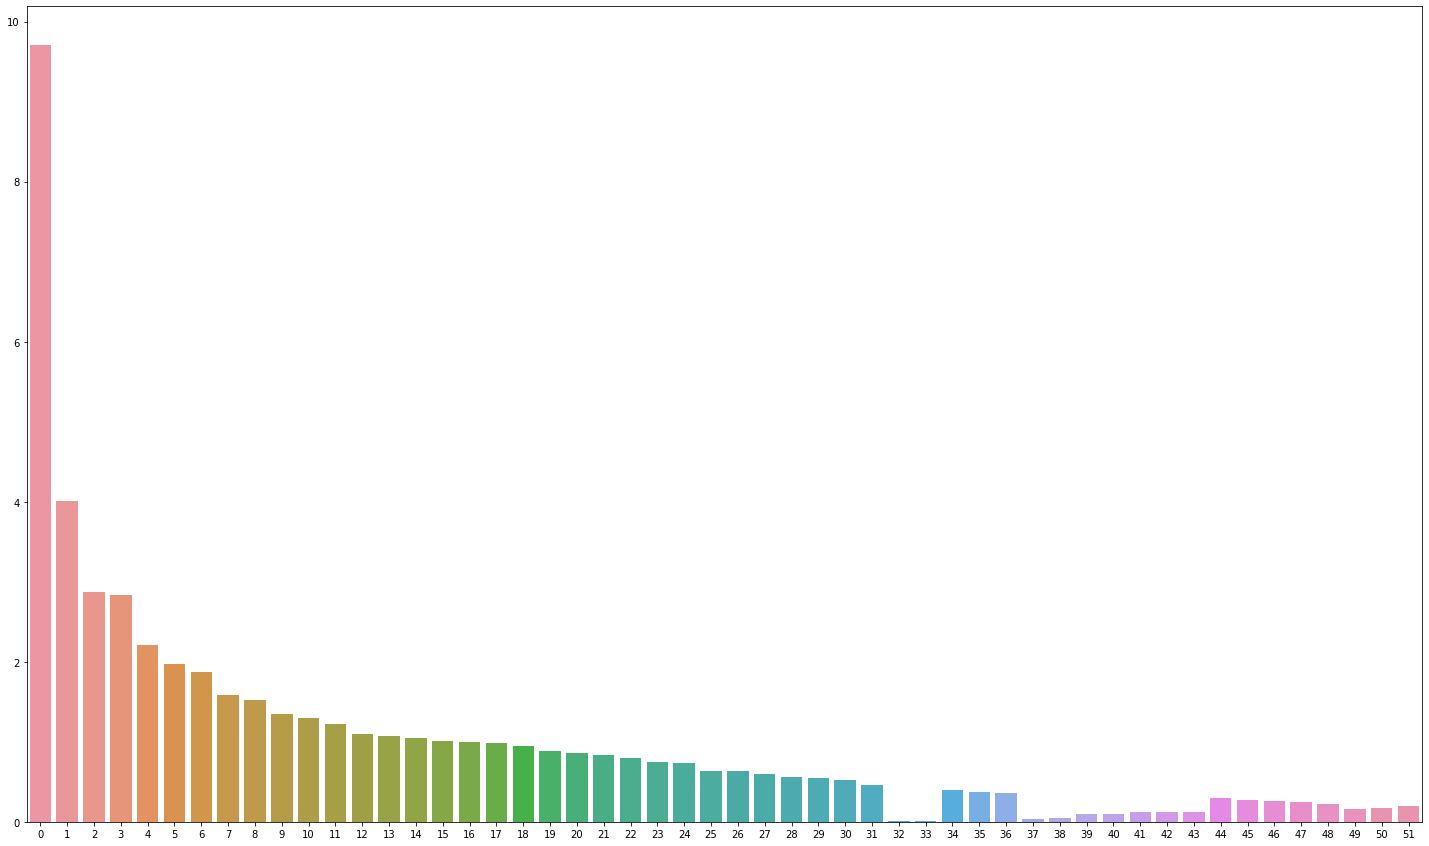

In [359]:
sns.barplot(x=np.arange(0, 52), y=eig_val)
plt.show()

In [360]:
var_exp_ratio = np.cumsum(eig_val)/eig_val.sum()
var_exp_ratio

array([0.18651159, 0.26346097, 0.31869426, 0.37328039, 0.41583658,
       0.45375581, 0.48979793, 0.52034179, 0.5496647 , 0.57559308,
       0.60041124, 0.62387969, 0.64494608, 0.66554197, 0.68564176,
       0.70501628, 0.72420046, 0.74303252, 0.7613004 , 0.77825822,
       0.79474738, 0.81088097, 0.82625926, 0.84061374, 0.85478145,
       0.86708729, 0.87926182, 0.89079749, 0.90153023, 0.91193616,
       0.92189494, 0.93075542, 0.93083984, 0.93098624, 0.93869544,
       0.94576925, 0.95262393, 0.95337027, 0.95430151, 0.95606902,
       0.95796923, 0.96020499, 0.96248624, 0.96489943, 0.97070594,
       0.97597296, 0.9810319 , 0.98566909, 0.98986344, 0.99302547,
       0.99627214, 1.        ])

In [361]:
# Selecting variables that explain 90% of the variation in the data
var_exp_ratio[var_exp_ratio < 0.91].shape

(29,)

This is the first 30 variables, that is, the first 30 eigen vectors (First 30 columns in the eigen vector matrix)

In [363]:
pca_components = eig_vec[:, 0:30]
pca_components.shape

(52, 30)

In [364]:
X_pca = pd.DataFrame(data=X_std.dot(pca_components))
X_pca.shape

(1456, 30)

In [365]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.845683,-0.038740,-0.615006,-1.342872,2.047906,1.563839,-1.023351,-1.732794,-0.805899,-0.721154,-0.324647,0.195263,-0.734914,0.511821,-0.143529,-0.301196,0.040071,-0.090340,-0.309933,0.281714,0.090008,0.282925,0.048712,0.000794,0.446860,-0.263024,-0.559988,0.137674,0.489328,0.068212
1,0.613451,1.750358,0.536025,0.951076,0.005025,-0.455744,0.111319,1.632880,-0.899207,0.878165,2.034904,0.339096,-1.404879,-2.416133,0.369764,1.074073,0.636704,1.051201,-2.211300,-0.765777,-0.015088,0.605766,-0.018587,0.721633,-1.951054,-0.704299,0.624989,0.244858,-0.655345,-0.653170
2,2.640091,0.022638,-0.155838,-0.687245,1.595893,1.163547,-0.414067,-0.235238,0.582125,-0.044124,-0.449962,-0.110701,-0.266846,0.380433,0.055434,-0.485369,-0.367825,-0.208244,0.170721,-0.063961,0.147168,1.163692,0.058565,0.285227,0.261206,0.544374,-0.602421,0.622009,0.018457,-0.276327
3,0.181971,-0.487585,-0.570899,1.712046,0.348010,-0.453922,-0.167128,1.154255,-0.398904,-1.653042,-1.104540,-2.522132,-0.304177,-0.346929,-1.348774,-2.583798,1.157776,0.227495,0.713246,0.364194,-0.024631,1.857697,0.369341,0.022640,0.247342,0.572160,0.758868,-0.684028,-0.354516,0.732321
4,5.085379,-1.199664,0.664396,0.348391,1.133282,1.754521,-0.479734,-0.649437,-0.155606,-0.061837,0.374611,-0.379344,-0.582306,-0.296172,-0.190608,-0.114758,-0.480665,-0.659525,0.117072,-0.843415,0.403415,0.269289,-0.251892,-0.804135,0.488946,0.080775,-0.194636,0.635741,-0.233580,-0.632180


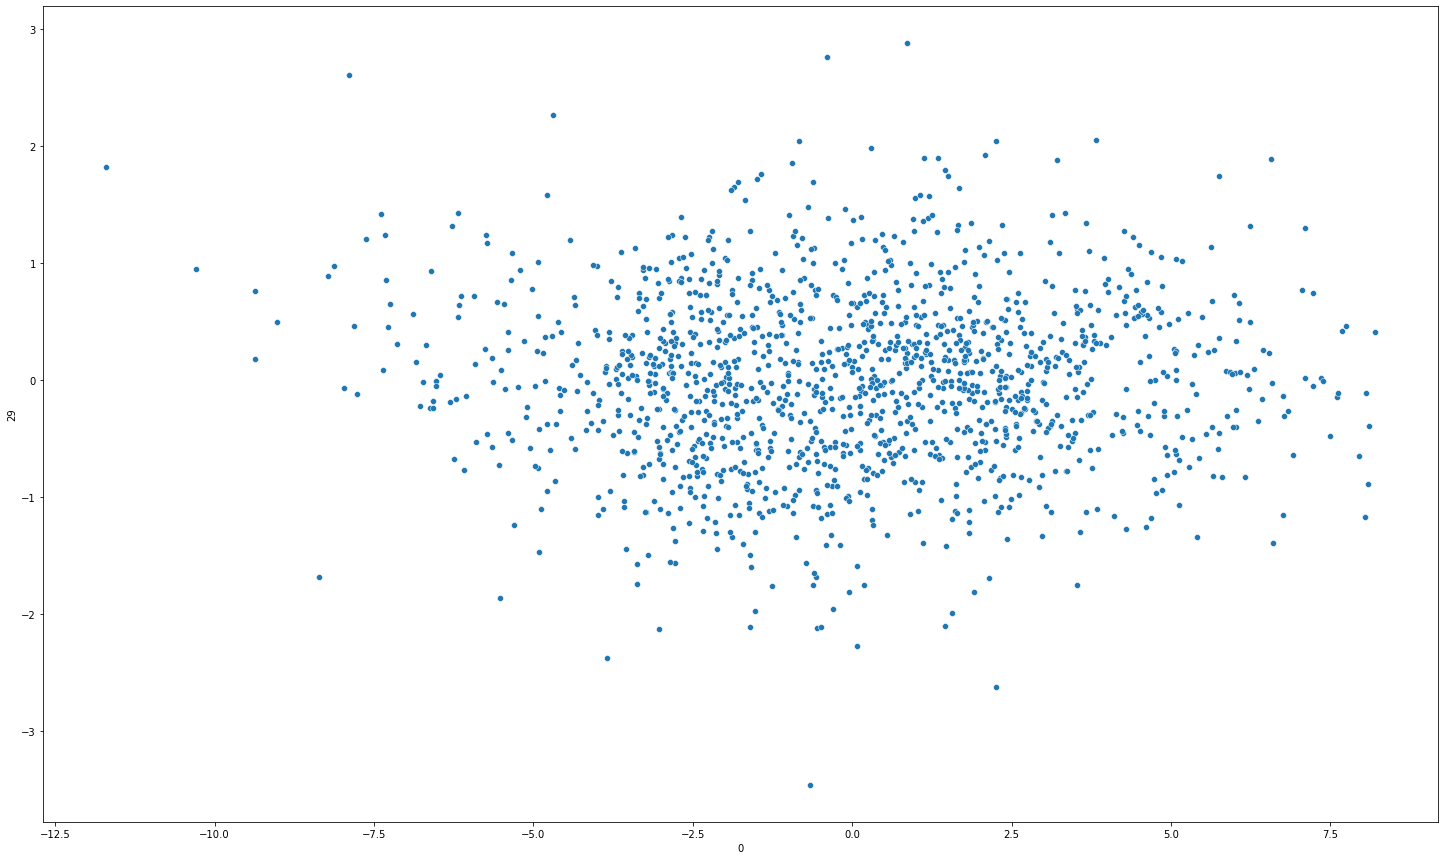

In [367]:
sns.scatterplot(x=X_pca[0], y=X_pca[29])
plt.show()

## Using the PCA components + Categorical Variables for Linear Regression

In [281]:
X_pca.shape

(1456, 31)

In [306]:
train_cat.shape

(1456, 177)

In [368]:
X_full_pca_cat = pd.concat([X_pca, train_cat], axis=1)
X_full_pca_cat.shape

(1460, 207)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

In [282]:
kf = KFold(n_splits=1456)
scores = cross_val_score(estimator=LinearRegression(), cv=kf, X=X_pca, y=y, scoring='neg_root_mean_squared_error')

print(scores)

[-1.23698446e+04 -4.32279133e+02 -1.27490747e+04 ... -2.63014858e+04
 -2.11664597e+01 -1.39410495e+04]


In [300]:
a = X_pca.iloc[0]
b = X_pca.iloc[j[0]]

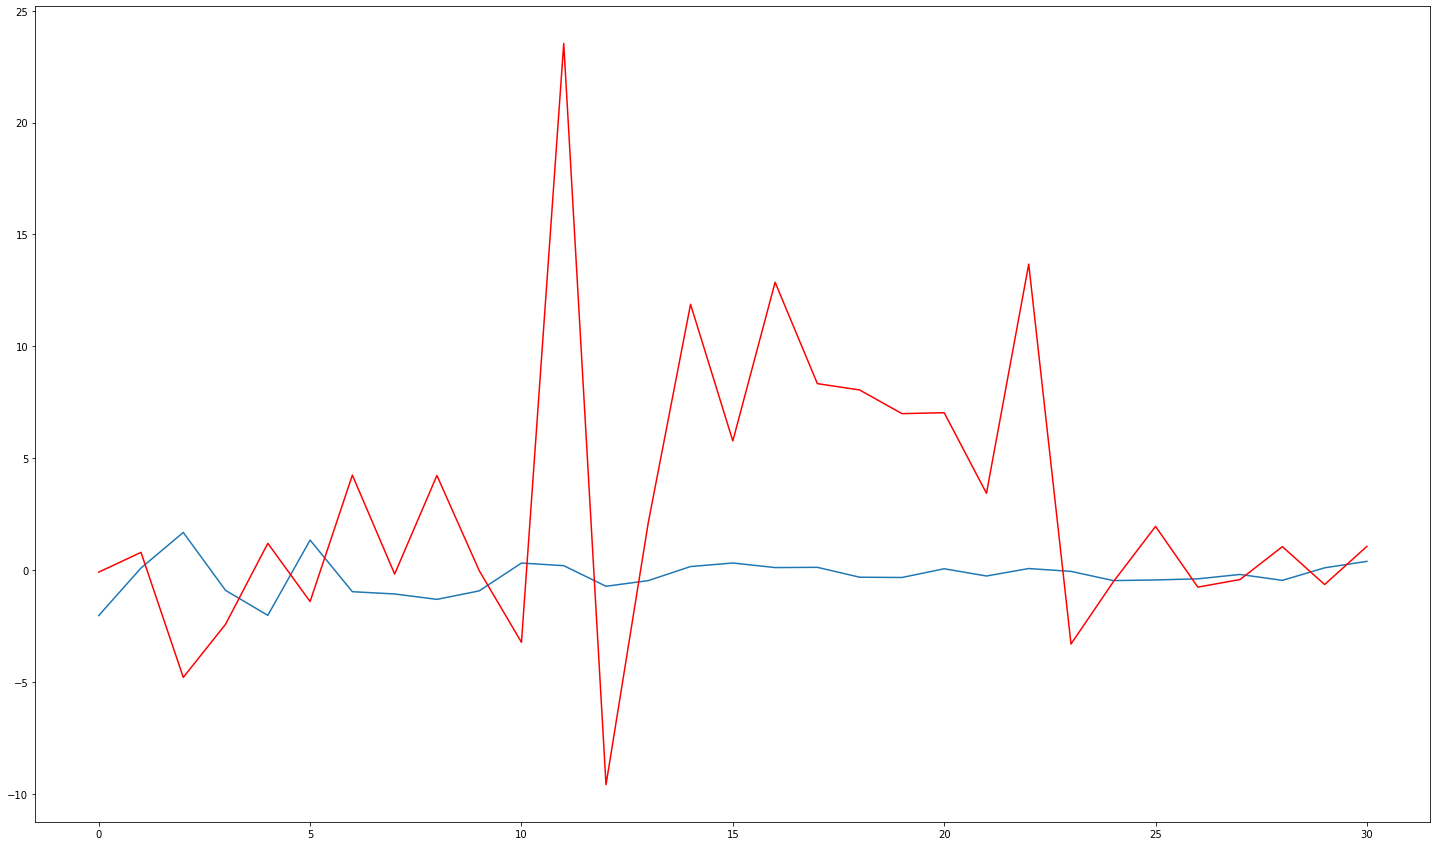

In [302]:
plt.plot(a)
plt.plot(b, c='r')

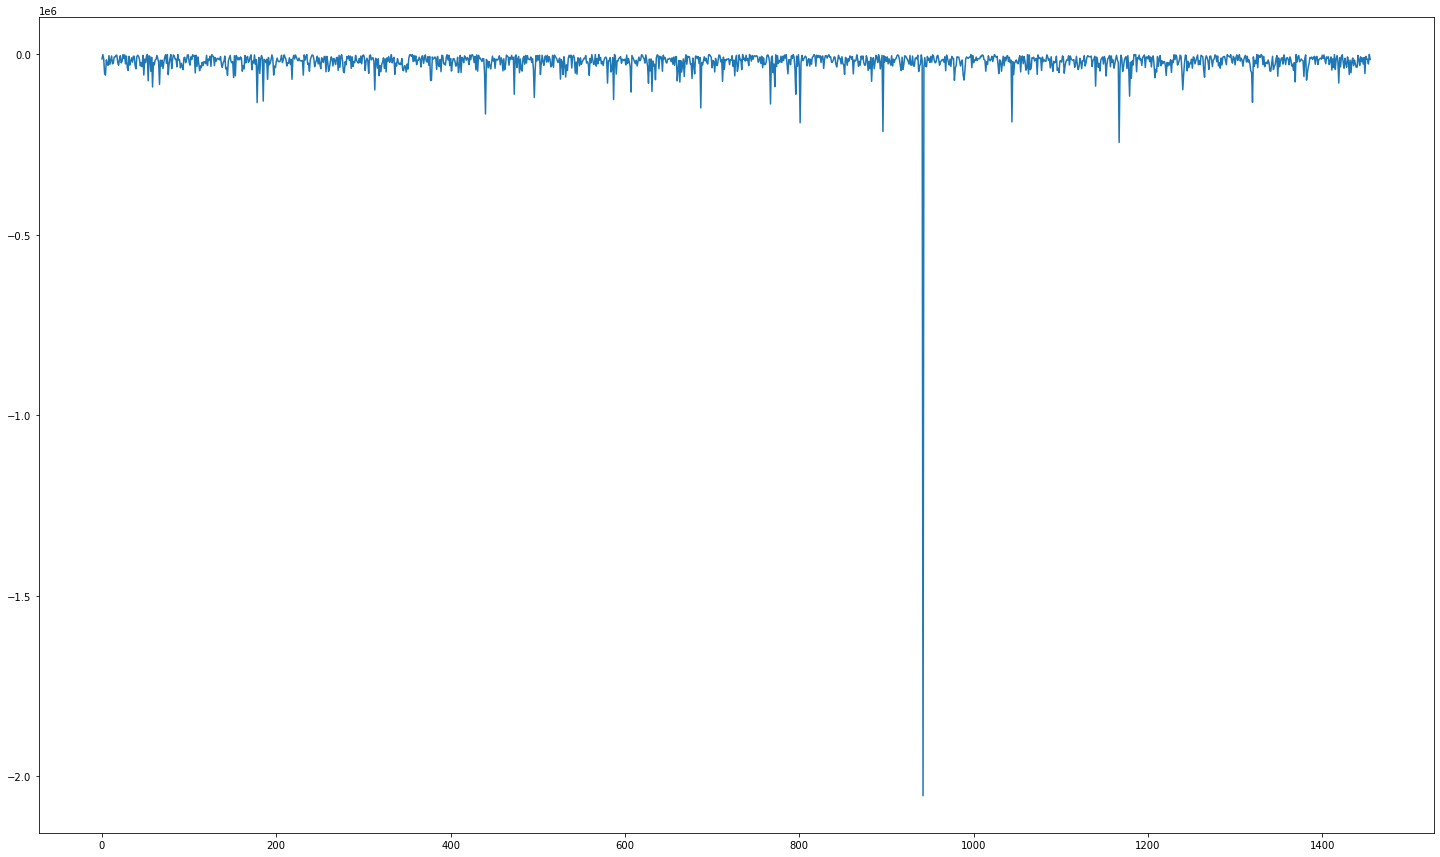

In [283]:
plt.plot(scores)

In [303]:
print('The mean bias error is: ', np.mean(scores))
print('The mean variance error is: ', np.std(scores, ddof=1))

The mean bias error is:  -22020.358230785565
The mean variance error is:  57394.64317430121


## Base Model - Full, No transformations

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy.stats import jarque_bera

In [35]:
y = train_full['SalePrice']
X = train_full.drop('SalePrice', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1019, 230)
X_test : (437, 230)
y_train : (1019,)
y_test : (437,)


In [37]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_hat_train = base_model.predict(X_train)

In [39]:
model_performance = pd.DataFrame(columns=['algo_name', 'adj_r2_train', 'adj_r2_test', 'Num. Features', 
                                          'rmse_train', 'rmse_test', 'jb_resid'])

def calc_r2(model, X, y):
    y_hat = model.predict(X)
    y_bar = y.mean()

    SSR = ((y_hat - y_bar)**2).sum()
    SST = ((y - y_bar)**2).sum()
    r2 = SSR/SST 
    
    return r2

def calc_adj_r2(r2, n, k):
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    return adj_r2

def add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, jb_resid):
    global model_performance
    
    model_scores = pd.Series(data=[algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, jb_resid], \
                             index=['algo_name', 'adj_r2_train', 'adj_r2_test', 'Num. Features', 'rmse_train', 'rmse_test', 'jb_resid'])
    
    model_performance = model_performance.append(model_scores, ignore_index=True)

def append_model_performance(algo_name, model, X_train, X_test, y_train, y_test):
    r2_train = calc_r2(model, X_train, y_train)
    r2_test = calc_r2(model, X_test, y_test)
    
    n1 = X_train.shape[0]
    n2 = X_test.shape[0]
    k = X_test.shape[1]
    
    adj_r2_train = calc_adj_r2(r2_train, n1, k)
    adj_r2_test = calc_adj_r2(r2_test, n2, k)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    
    resid = model.predict(X_test) - y_test
    
    t_stat, jb_resid_p_val = jarque_bera(resid)
    
    add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, jb_resid_p_val)

In [40]:
n = len(X_train)
k = len(X_train.columns)
r2_train = calc_r2(base_model, X_train, y_train)
r2_adj_train = calc_adj_r2(r2_train, n, k)
r2_test = calc_r2(base_model, X_test, y_test)
r2_adj_test = calc_adj_r2(r2_test, n, k)

In [41]:
append_model_performance('Base Model - All Featuresm, no scaling or transformations', base_model, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,jb_resid
0,"Base Model - All Featuresm, no scaling or tran...",0.918274,1.040412,230,19847.330816,27195.725703,0.0


In [26]:
# From the RMSE train and test, we see that the model is slightly overfitting the fitting. 
# we need to reduce the bias in the model - maybe by regularization

In [27]:
X_train.shape

(1019, 301)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, ind) for ind in range(X_train.shape[1])]
vif

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[1.3499943733458335,
 44.30033625965781,
 1.9484406634706133,
 4.774465096524276,
 6.137589035387734,
 3.1734983296877313,
 17.697599189604897,
 4.319888948970561,
 3.607459185961621,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 3.3850331435687875,
 1.6954786526218928,
 4.567977393061597,
 3.4031769170800343,
 4.057657909570905,
 6.1790256762809745,
 7.670219284786203,
 8.131774720353722,
 7.766157717629764,
 9.23577440613149,
 8.524885774174798,
 1.7257864609386475,
 1.6411148127720934,
 2.008688388876564,
 1.2706630535329644,
 1.5842700318717078,
 197.82539950591126,
 12.057939589521755,
 1.3331237119325232,
 1.45429062357547,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,

In [29]:
df_vif = pd.DataFrame({'Feature': X_train.columns, 'VIF': vif})
df_vif[df_vif.VIF > 10]

,Feature,VIF
1,MSSubClass,44.300336
6,YearBuilt,17.697599
9,BsmtFinSF1,inf
10,BsmtFinSF2,inf
11,BsmtUnfSF,inf
...,...,...
296,SaleCondition_AdjLand,inf
297,SaleCondition_Alloca,inf
298,SaleCondition_Family,inf
299,SaleCondition_Normal,inf


In [30]:
y_hat_train = base_model.predict(X_train)
y_hat_test = base_model.predict(X_test)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


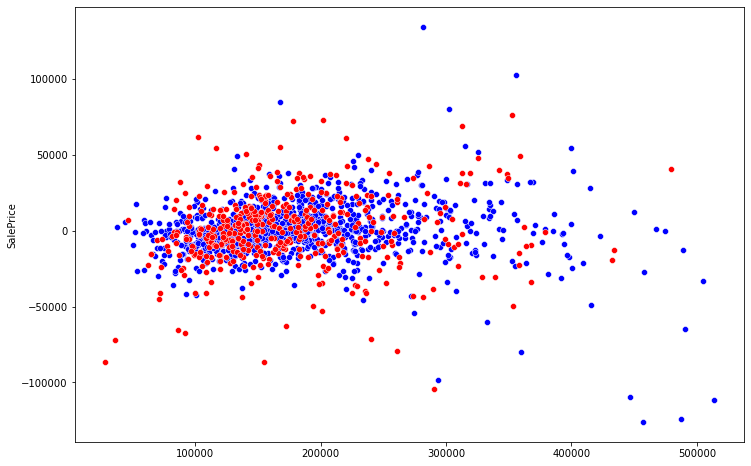

In [31]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.scatterplot(y_hat_train, y_hat_train - y_train, color='Blue')
sns.scatterplot(y_hat_test, y_hat_test - y_test, color='Red')
plt.show()